# Trendy Topic Analysis
#### Author: Tianjun MA
#### Andrew ID: tianjunm

---

## Introduction

In this tutorial, I will be introducing the methods to gather information about trendy topics online. Trendy, in this case, means the information that many people care about. This information can come from what people post on various social network websites, from the youtubers that millions of people subscribe to, and also from online journals, charts, and various other forms of accessible information. 
In this tutorial, we will use Twitter as our main platform for analyzing trendy topics. Our methodology is based on the following assumption: 

- The most popular twitter user has the most followers. 
    If a user is very popular, which means that many people are his/her followers, that user's post will be considered as a major component of our result because naturally, his/her posts will be viewed by a considerable amount of people and thus should be considered as what most people are interested in currently. 

Our first step is to be able to categorize and arrange such information to an informative, clean, and organzied format. And then we will perform various operations on the reformatted data to generate our desired results. In this tutorial, we will use twitter as the primary source of information. And: 
- get access to twitter data
- transform the data into managable content
- analyze the content
- generating output

---

## Table of Content

#### -Source of Information






  - Twitter

#### -Handle Information

  - Raw Formats
  - Turn into manageable Formats
  - Manipulating Manageable Formats

#### -Basic Tools

  - Tweepy
    - To access the data of twitter website, and dump the Twitter stream to manageable content such as pandas dataframe.
  - Json
    - Store what we get from tweepy
  - Pandas
    - For putting json objects to pandas dataframe that can be manipulated.
    - Performs different operations on what is translated from csv file.
  - nltk
    - Analyze the content of text.
    - Filtering unnecessary content.
    - Generating conclusion from text.
  - myplotlib
    - Visualize the result of our analysis

#### -Generating Results(Implementation)

---

### Source of Information

- Twitter

Twitter is a widely-used online platform for people to view what they're interested in. There are different areas that people can subscribe to, and also many public accounts whose posts attract many other users. As a diverse and accessible platform, twitter is a perfect resource that reflects people's interests.

---

### Handle Information

####  Raw formats
- website
  - impossibe to work with without transformation into a more flexible format
  - information is scattered and hard to categorize

#### Manageable formats
- json file
  - put scattered information to packages and dictionaries
  - much easier to work with because we can use can extract information with json libarary

#### Manipulating transformed format
- pandas dataframe : We can extract information from a json object and put it into pandas dataframe, a table format that allows many manipulation of relational data on the table.

#### Visual representation
- matplotlib : 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms (From matplitlib online documentation)

---

### Basic Tools

#### Tweepy
An easy-to-use Python library for accessing the Twitter API.
First, to work with twitter api correctly, we need to include the following packages:

In [229]:
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

#### Json
json is what we will use as an intermediate data format to store what we get from twitter website.

In [231]:
import json

#### Pandas: powerful Python data analysis toolkit

Pandas is a data analysis tool. This library is very helpful in manipulating the data in the file translated from actual websites(csv or json file). It covers manipulations of relational data and can be used to work with sqlite tables.

In [232]:
import pandas as pd

#### nltk

nltk is a natrual language processing tool that can provide us with great help in treating the texts we gathered from website and raw csv files. It can filter all the unnecessary information based on our preference.

In [233]:
import nltk

#### matplotlib
matplotlib is a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. matplotlib can be used in python scripts, the python and ipython shell (ala MATLAB®* or Mathematica®†), web application servers, and six graphical user interface toolkits.

In [234]:
%matplotlib inline
import matplotlib
matplotlib.use("svg")
import matplotlib.pyplot as plt

#### miscellaneous
We need some general libraries to perform some basic string or arithmetic operations.

In [253]:
import string
from nltk.tag import pos_tag
from collections import Counter
import numpy as np

---

### Implementation

#### Extract information from Twitter website
In order to work with the information on Twitter, the very first step we should do is to get all relavent information from the twitter website. The information includes: users, their followers, their friends, and their tweets.

##### 1. Creating a Twitter app
In order to work with Twitter, we have to conform to Twitter's rules for accessing its data. We do this by creating an app using our own twitter account.
Creating a new app - https://apps.twitter.com/app/new. Fill in your information to get the authentication key for Api.  

##### 2. Store the authentication key into local file
We store the authentication keys into a file(put your own file here!) and load it in the following way:

In [235]:
config_filepath = "config_secret.json" # change this to your own local key!

with open(config_filepath) as f:
    json_data = json.load(f)
    consumer_key=json_data["consumer_key"]
    consumer_secret=json_data["consumer_secret"]
    token=json_data["token"]
    token_secret=json_data["token_secret"]

Using tweepy to authenticate our access to twitter:

In [240]:
# uncomment the following to enable a twitter stream to store the data from twitter website to a local file
# class Listener(StreamListener):
#
#     def on_data(self, data):
#         with open("tweets.txt", 'a') as tweets:
#             tweets.write(data)
#         return True
#
#     def on_error(self, status):
#         print status

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(token, token_secret)
api = tweepy.API(auth)

We gather information from twitter and then put it in a file:

In [241]:
# uncomment to begin streaming

# stream = Stream(auth, Listener)
# stream.filter(track = ['python'])

##### 3. Get twitter stream as json file

Now we have the text file storing all the twitter's stream we gathered using tweepy. This will allow us to:
- see the results clearly and 
- be able to work with dataframe using pandas.

In this tutorial, I will be using a txt file that contains twitter data already. This txt file is the result of running stream.filter() for 1 hour.

In [242]:
# change this to your own file address
tweets_path = 'tweets.txt'

data = []
tweet_file = open(tweets_path, "r")
for line in tweet_file:
    try:
        info = json.loads(line)
        data.append(info['user'])
    except:
        continue

##### 4. Perform table operation using pandas dataframe
There are multiple things we can do with the pandas dataframe that we filled with twitter information.
- Getting all the information about each entry
  - followers of the user
  - the total number of followers this user has
  - the tweet this user posts
  - the mostly endorsed tweet from this user

In [243]:
tweets_info = pd.DataFrame()

#### - Get the top 10 user with most followers

There are multiple steps for us to get the top n users with most number of followers.
First, we will use transfer useful information from the json file to our dataframe.

In [244]:
tweets_info['screen_name'] = map(lambda info: info['screen_name'], data)
tweets_info['followers_count'] = map(lambda info: info['followers_count'], data)

Then, we will get an unsorted table with username and followers count.

In [245]:
# Example
tweets_info.head()

,screen_name,followers_count
0,slangenforum,128
1,GiveMeTheNite,162
2,pasanteuniojeda,724
3,Andry_Carol,316
4,vanausloos,43


And once we have the dataframe table, it will be very easy to perform sorting operation:

In [246]:
tweets_info.sort_values(['followers_count'], ascending = False, inplace = True)
tweets_info.reset_index(drop = True, inplace = True)

In [247]:
# Example
tweets_info.head()

,screen_name,followers_count
0,globeandmail,1453573
1,nationalpost,698040
2,CityNews,412243
3,habrahabr,319148
4,TheTorontoSun,269955


We select the first 50 users with most followers and gather their tweets with largest retweet count.

In [76]:
top_users = tweets_info.head(50)

#### - Get the tweets from those users

According to our methodology, our next goal is to get the most popular tweets from the users with most followers. Therefore, we will extract the tweets with over 20 retweet counts from the most popular accounts.

First, we introduce some of our helper functions when we deal with the tweets:

In [250]:
# since what we parse from the stream are unicodes, we have to transform them into strings
def get_str(u_t):
    u_t = u_t.encode('ascii','ignore')
    return u_t

# our get_max function helps us extract the relatively popular tweet text from a given stream,
# based on the retweet count
def get_many(user_tweets):
    retweeted = []
    for tweet in user_tweets:
        if tweet['retweet_count'] > 10:
            retweeted.append(get_str(tweet['text']))
    return retweeted

The following is our main function to extract tweets from the most popular users.

In [251]:
# this variable stores the processed texts from what we consider as popular texts.
popular_texts = []

In [249]:
for i, row in top_users.iterrows():
    user = row['screen_name']
    tweets = api.user_timeline(screen_name = user, count = 50)
    
    # credit to http://stackoverflow.com/questions/27900451/convert-tweepy-status-object-into-json
    all_tweets = []
    
    for tweet in tweets:
        json_tweet = (tweet._json)
        all_tweets.append(json_tweet)
    popular_texts+=get_many(all_tweets)

##### 5. Extract useful keywords from the tweets
We achieve this by utilizing nltk to remove useless noises

In [254]:
def remove_noise(text, lemmatizer=nltk.stem.wordnet.WordNetLemmatizer()):
    """ Normalizes case and handles punctuation
    Inputs:
        text: str: raw text
        lemmatizer: an instance of a class implementing the lemmatize() method
                    (the default argument is of type nltk.stem.wordnet.WordNetLemmatizer)
    Outputs:
        list(str): tokenized text
    """
    exclude = string.punctuation
    processed = []
    
    
    text = text.lower()
    
    # handle puctuations
    text = text.replace("'s", "")
    text = text.replace("'", "")
    
    for c in exclude:
        text = text.replace(c, " ")
    
    for word in nltk.word_tokenize(text):
        try:
            lemmatized = str(lemmatizer.lemmatize(word))
            processed.append(lemmatized)
        except:
            continue
    
    return processed


# apply remove_noise function and store the result to all_words, which is a list 
# that consists of meaningful words from text we extracted.

all_words = []

for text in (popular_texts):
    all_words += (remove_noise(text))
    
# we also want to remove words that don't have any meanings
stripped = []
for word in all_words:
    if not (str.isdigit(word) or len(word) <= 2 or word in ['http']):
        stripped.append(word)

##### 6. Count the most frequently appeared words

In [258]:
# get_nouns returns the nouns in a given list of words
def get_nouns(tags):
    nouns = []
    for (word, tag) in tags:
        if tag == 'NN':
            nouns.append(word)
    return nouns

# the pos_tag from nltk library will help us label to category of words in the given list
tagged = pos_tag(stripped)
nouns = get_nouns(tagged)
counter = Counter(nouns)

##### 7. Re-format the data as ordered dataframe consisting of popular words and count
After using nltk, we should utilize pandas dataframe again to present our result in a more readble form.

In [257]:
stats = pd.DataFrame.from_dict(counter, orient='index').reset_index()
stats.sort_values([0],ascending = False, inplace = True)
stats = stats.rename(columns = {'index':'Keyword', 0:'Count'})
stats = stats.head(30)
stats = stats.reset_index(drop = True)

# Example
stats.head()

,Keyword,Count
0,christianity,88
1,sofiaorden,57
2,university,56
3,amp,56
4,study,46


##### 8. Visualize the data
Using matplotlib, represent the result csv visually. Now you see the most popular keywords that users care about!

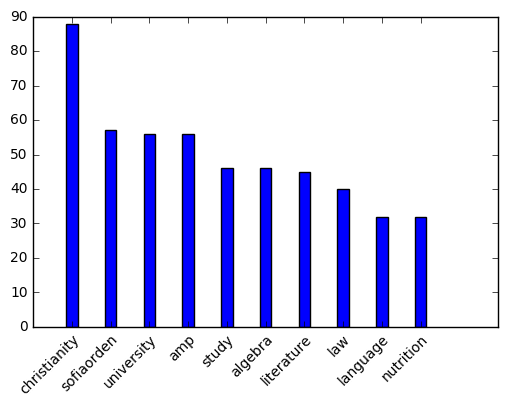

In [259]:
top = 10
data = stats["Count"][:top]
keywords = stats["Keyword"][:top]

# plotting advice from http://stackoverflow.com/questions/15938532/matplotlib-histogram-and-bin-labels
ax = plt.subplot()
width=0.3
bins = map(lambda x: x-width/2,range(1,len(data)+1))
ax.bar(bins, data,width=width)
ax.set_xticks(map(lambda x: x, range(1,len(data)+1)))
ax.set_xticklabels(keywords,rotation=45,rotation_mode="anchor", ha="right")
plt.show()

After this tutorial, we now have a better idea of how to work with data from websites, representing them in a more organized way, and visualize our conclusion. We can use similar methodology to analyze other forms of data and be able to discover interesting patterns online.

---